# Day 10

In [134]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [30]:
with open('Data_Aoc_2023/Data_D10.txt') as f:
    l=f.readlines()
    lol=[[a for a in i] for i in l]

In [31]:
pipes = {'|':['N','S'], '-':['W','E'], 'L':['N','E'], 'J':['N','W'],'7':['S','W'],'F':['S','E']}

In [32]:
def find_S(map):
    for k, ligne in enumerate(map):
        for j, pos in enumerate(ligne):
            if pos == 'S':
                return [k,j]

def find_start(pos, map):
    if 'S' in pipes[map[pos[0]-1][pos[1]]]:
        return [pos[0]-1,pos[1]], 'S'
    elif 'N' in pipes[map[pos[0]+1][pos[1]]]:
        return [pos[0]+1,pos[1]], 'N'
    elif 'W' in  pipes[map[pos[0]][pos[1]+1]]:
        return [pos[0],pos[1]+1], 'W'
    elif 'E' in  pipes[map[pos[0]][pos[1]-1]]:
        return [pos[0],pos[1]-1], 'E'
    else:
        raise ValueError('On est coincés, chef!')            

def other(l,a):
    if a == l[0]:
        return l[1]
    elif a == l[1]:
        return l[0]
    else:
        raise ValueError('Pas dans les choix')
    
def rev(s):
    if s == 'N':
        return 'S'
    elif s == 'S':
        return 'N'
    elif s == 'W':
        return 'E'
    else:
        return 'W'

def next_step(pos, origin, map):
    pipe = map[pos[0]][pos[1]]
    exit = other(pipes[pipe],origin)
    if exit == 'N':
        return [pos[0]-1,pos[1]], exit
    elif exit == 'S':
        return [pos[0]+1,pos[1]],exit
    elif exit == 'E':
        return [pos[0],pos[1]+1],exit
    else:
        return [pos[0], pos[1]-1],exit

### Part 1

In [38]:
find_S(lol)

[115, 40]

In [39]:
res = 2
starter = find_start(find_S(lol),lol)
pos = starter[0]
origin = starter[1]
while lol[pos[0]][pos[1]] != 'S':
    res+=1
    temp, dir = next_step(pos, origin, lol)
    pos = temp
    origin = rev(dir)
res//2

6867

### Part 2

In [68]:
def compatible(a,b):
    if a == 'L' and b== 'J':
        return True
    elif a == 'F' and b == '7':
        return True
    elif a == '.':
        return True
    else:
        return False

In [74]:
loop = [find_S(lol)]
starter = find_start(find_S(lol),lol)
pos = starter[0]
origin = starter[1]
while lol[pos[0]][pos[1]] != 'S':
    loop.append(pos)
    temp, dir = next_step(pos, origin, lol)
    pos = temp
    origin = rev(dir)



In [84]:
lh_min = len(lol)
lh_max = 0
lw_min = len(lol[0])
lw_max = 0
for l in loop:
    if l[0] <lh_min:
        lh_min = l[0]
    if l[0] > lh_max:
        lh_max = l[0]
    if l[1] <lw_min:
        lw_min = l[1]
    if l[1] > lw_max:
        lw_max = l[1]

print(lh_min,lh_max,lw_min,lw_max)

4 137 1 138


In [96]:
loop

[[115, 40],
 [114, 40],
 [113, 40],
 [112, 40],
 [111, 40],
 [110, 40],
 [109, 40],
 [109, 39],
 [110, 39],
 [111, 39],
 [112, 39],
 [113, 39],
 [114, 39],
 [114, 38],
 [113, 38],
 [112, 38],
 [111, 38],
 [110, 38],
 [109, 38],
 [108, 38],
 [108, 39],
 [108, 40],
 [107, 40],
 [107, 41],
 [107, 42],
 [106, 42],
 [105, 42],
 [104, 42],
 [103, 42],
 [103, 41],
 [103, 40],
 [104, 40],
 [104, 41],
 [105, 41],
 [106, 41],
 [106, 40],
 [105, 40],
 [105, 39],
 [106, 39],
 [107, 39],
 [107, 38],
 [106, 38],
 [105, 38],
 [104, 38],
 [104, 39],
 [103, 39],
 [102, 39],
 [102, 40],
 [102, 41],
 [102, 42],
 [101, 42],
 [100, 42],
 [100, 43],
 [99, 43],
 [99, 42],
 [98, 42],
 [98, 41],
 [99, 41],
 [99, 40],
 [100, 40],
 [100, 41],
 [101, 41],
 [101, 40],
 [101, 39],
 [100, 39],
 [99, 39],
 [98, 39],
 [97, 39],
 [97, 38],
 [98, 38],
 [99, 38],
 [99, 37],
 [100, 37],
 [100, 38],
 [101, 38],
 [101, 37],
 [102, 37],
 [102, 38],
 [103, 38],
 [103, 37],
 [104, 37],
 [105, 37],
 [105, 36],
 [106, 36],
 [106

In [131]:
def inside_loop(pos,map):
    width = len(map[0])
    height = len(map)
    sud = 0
    nord = 0
    east = 0
    west = 0
    if pos[0]<lh_min or pos[0]>lh_max:
        return False
    if pos[1] < lw_min or pos[1]>lw_max:
        return False
    if pos in loop:
        return False
    for k in range(1,height - pos[0]):
        if [pos[0]+k,pos[1]] in loop and map[pos[0]+k][pos[1]]!= '|':
            sud +=1
    #for k in range(pos[0]):
        #if [k,pos[1]] in loop and map[k][pos[1]]!= '|':
            #nord += 1
    for k in range(pos[1]):
        if [pos[0],k] in loop and map[pos[0]][k] != '-':
            west += 1
    #for k in range(1,width-pos[1]):
        #if [pos[0],pos[1]+k] in loop and map[pos[0]][pos[1]+k] != '-':
            #east += 1
    return (sud % 2 ==0 and west %2 ==0) == False


In [130]:
inside_loop([115,6],lol)

False

In [132]:
res = 0
for i , ligne in enumerate(lol):
    if i % 10 ==0:
        print('ligne', i)
    for j, pos in enumerate(ligne):
        if inside_loop([i,j], lol):
            res += 1
res

ligne 0
ligne 10
ligne 20
ligne 30
ligne 40
ligne 50
ligne 60
ligne 70
ligne 80
ligne 90
ligne 100
ligne 110
ligne 120
ligne 130


2026

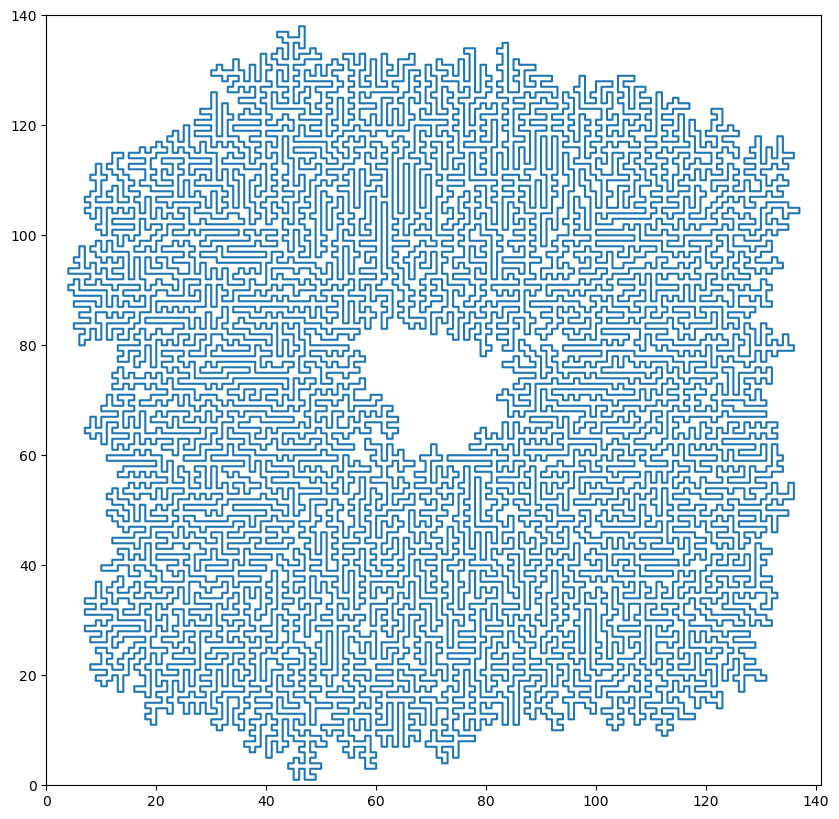

In [160]:
fig, ax = plt.subplots(figsize = (10,10))
poly = Polygon(loop)
 
x, y = poly.exterior.xy
ax.plot(x, y)
ax.axis([0, len(lol[0]), 0, len(lol)])
plt.show()